# Fourier Expansion of the W1 Function

Process:
- Define the W1 function
- Create a grid
- Define the basis
- Find the Coefficients
- Plot the interpolation
- Create a convergence plot of the integral of W1

## Define the W1 function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def evalW1(x):
    return np.exp(np.cos(2*np.pi*x))

Plot the W1 to make sure it is correct.

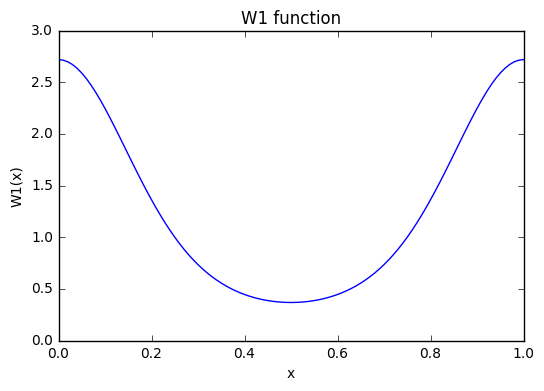

In [3]:
x = np.linspace(0,1,101)
fx = evalW1(x)
plt.plot(x,fx)
plt.xlabel("x")
plt.ylabel("W1(x)")
plt.title("W1 function")
plt.show()

## Create a grid

In [3]:
def makegrid(n, offset):
    xmin = 0.
    xmax = 1.
    dx = (xmax - xmin)/n
    grid = [dx*i + offset for i in range(n)]
    return grid

## Define the basis

In [4]:
def evalbasis(x, i):
    """The basis of our interpolation.
    Args:
        x (float): the position where the basis is evaluated.
        i (int): the frequency or wave number of the basis function.
    """
    return np.cos(2*np.pi*x*i)

Plot the basis functions.

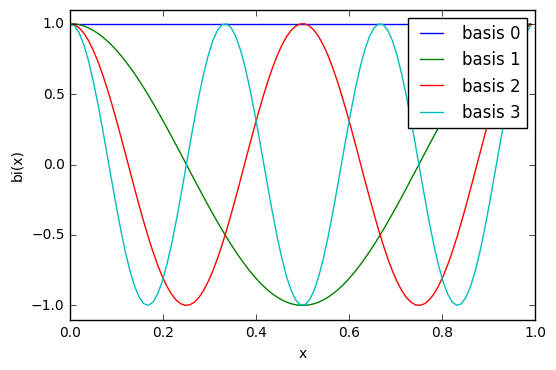

In [6]:
npts = 101
offset = 0.
g = makegrid(npts, offset)
nbasis = 4
for i in range(nbasis):
    bs = [evalbasis(xi,i) for xi in g]
    plt.plot(g, bs, label="basis %s" %i)
plt.ylim(-1.1, 1.1)
plt.xlabel("x")    
plt.ylabel("bi(x)")
plt.legend()
plt.show()

## Find the coefficients

The coefficients are found from solving F = BA where F is a vector of function evaluations at the grid points, B is a matrix of basis function evaluations, and A is a vector of coefficients.

Let's make sure B takes the values we expect for a few test cases.

In [5]:
def makeB(x, npts):
    """Create the B matrix used for interpolating a function.
    Args:
        x (list or numpy.ndarray): points at which to evaluate the basis functions.
        npts (int): an integer that gives the number of basis functions and the wave
            vector or frequency of the basis functions.
    """
    return np.asarray([[evalbasis(xi, i) for i in range(npts)] for xi in x])

In [8]:
npts = 2
offset = 0.0
grid = makegrid(npts, offset)
Bexpected = np.array([[1, 1],[1, -1]])
np.allclose(makeB(grid, npts), Bexpected)

True

In [9]:
npts = 2
offset = 0.25
grid = makegrid(npts, offset)
Bexpected = np.array([[1, 0],[1, 0]])
np.allclose(makeB(grid, npts), Bexpected)

True

In [10]:
npts = 3
offset = 1./6
grid = makegrid(npts, offset)
Bexpected = np.array([[1., 1./2, -1./2],[1., -1., 1.], [1., 1./2, -1./2]])
np.allclose(makeB(grid, npts), Bexpected)

True

Now that we have more confidence in B, lets find the coefficients. These are found from computing $A = B^{-1}F$

In [11]:
npts = 2
offset = 0.0
grid = makegrid(npts, offset)
F = np.asarray([evalW1(x) for x in grid])
B = makeB(grid, npts)
A = np.dot(np.linalg.inv(B), F)

## Plot the Interpolation

Define a function that will evaluate the the interpolation

In [6]:
def eval_interp(A, x):
    return np.sum([A[i]*evalbasis(x, i) for i in range(len(A))])

Plot the interpolation.

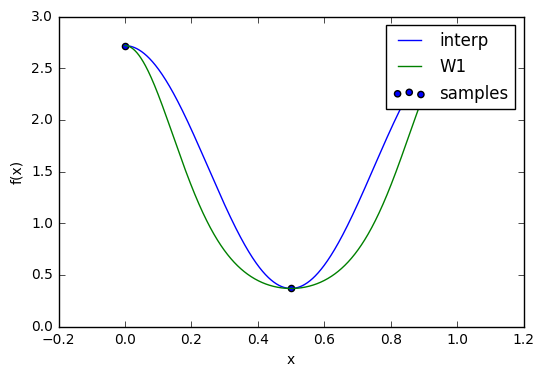

In [13]:
finegrid = np.linspace(0, 1, 1001)
interp = [eval_interp(A, xi) for xi in finegrid]
W1 = [evalW1(xi) for xi in finegrid]
plt.plot(finegrid, interp, label="interp")
plt.scatter(grid, F, label="samples")
plt.plot(finegrid, W1, label="W1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

Let's interpolate it with a variety of grids with no offset.

In [14]:
nptlist = range(2,11)
offset = 0.0
for npts in nptlist:
    grid = makegrid(npts, offset)
    F = np.asarray([evalW1(x) for x in grid])
    B = makeB(grid, npts)
    print(np.linalg.det(B))

-2.0
-2.74780198595e-15
-4.4408920985e-15
-5.91615839547e-30
-3.06509439533e-28
-3.37818031367e-43
-1.09640643145e-42
1.19253201828e-56
5.57168302142e-57


This won't work since the B matrix has determinant 0 and has no inverse. Let's try it with offset = dx/2.

In [15]:
nptlist = range(2,11)
for npts in nptlist:
    offset = (1 - 0.)/(2*npts)
    grid = makegrid(npts, offset)
    F = np.asarray([evalW1(x) for x in grid])
    B = makeB(grid, npts)
    print(np.linalg.det(B))

-2.44929359829e-16
3.74700270811e-15
1.17234728734e-30
-2.41164575431e-31
-3.26531640845e-44
5.20628703174e-42
-3.6162929064e-57
-4.66506327603e-57
-9.0873128744e-71


This also won't work. Try it with offset = dx/10

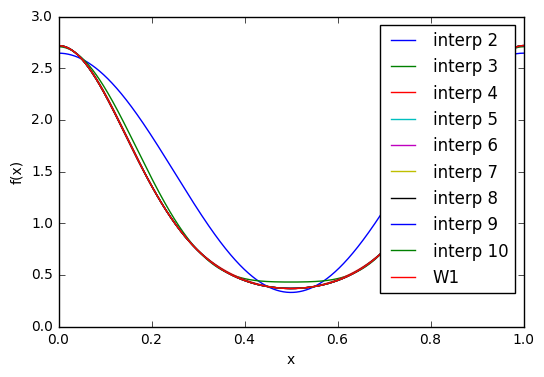

In [16]:
nptlist = range(2,11)
for npts in nptlist:
    offset = (1. - 0.)/(10.*npts)
    grid = makegrid(npts, offset)
    F = np.asarray([evalW1(x) for x in grid])
    B = makeB(grid, npts)
    A = np.dot(np.linalg.inv(B), F)
    interp = [eval_interp(A, xi) for xi in finegrid]
    plt.plot(finegrid, interp, label="interp %s" %npts)
plt.plot(finegrid, W1, label="W1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

Plot the magnitude of the coefficients.

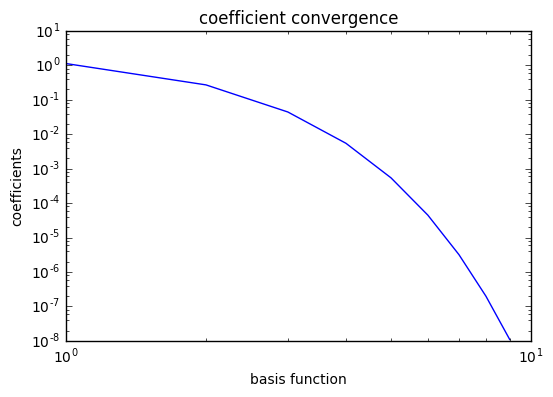

In [17]:
plt.loglog(range(len(A)), A)
plt.title("coefficient convergence")
plt.ylabel("coefficients")
plt.xlabel("basis function")
plt.show()

This is the behavior we expect and it isn't unique to offset = dx/10, it will work for any offset besides 0 and dx/2.

## Convergence Plot of $\int_0^1 \text{d}x \, W1$

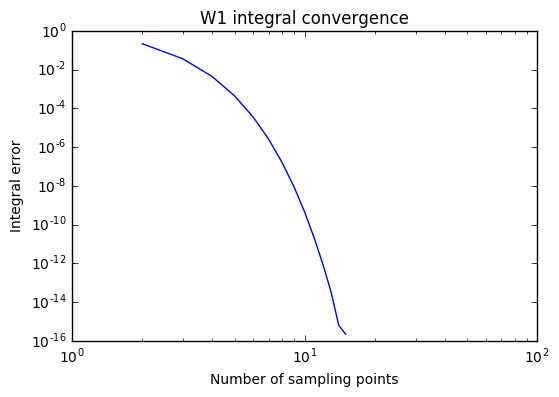

In [18]:
answer = 1.2660658777520083356
errors = []
nptlist = range(2,16)
for npts in nptlist:
    offset = (1. - 0.)/(10.*npts)
    grid = makegrid(npts, offset)
    F = np.asarray([evalW1(x) for x in grid])
    B = makeB(grid, npts)
    A = np.dot(np.linalg.inv(B), F)
    errors.append(np.abs(answer - A[0]))
plt.title("W1 integral convergence")
plt.xlabel("Number of sampling points")
plt.ylabel("Integral error")
plt.loglog(nptlist, errors)
plt.show()

This result is also expected. Let's do the interpolation exploiting Fourier's trick.

Define a function that finds the basis coefficients

In [7]:
# This function, taken from itertools recipes, combines two lists
# and is used to find the weights for different integration methods.
from itertools import cycle, islice
def roundrobin(*iterables):
    "roundrobin('ABC', 'D', 'EF') --> A D E B F C"
    # Recipe credited to George Sakkis
    pending = len(iterables)
    nexts = cycle(iter(it).__next__ for it in iterables)
    while pending:
        try:
            for next in nexts:
                yield next()
        except StopIteration:
            pending -= 1
            nexts = cycle(islice(nexts, pending))

def findAi(func, basis, grid, i, xmin, xmax, method,*args):
    """Find the value of one of the coefficients
    
    Args:
        func (function): the function being expanded
        basis (function): the basis in the expansion
        grid (list or numpy.ndarray): the points at which the function is known.
        i (int): basis function or coefficient label
        xmin (float): the x value of the start of the domain of func
        xmax (float): the xvalue of the end of the domain of func
        method (string): the method of integration
        *args: additional arguments for the function being expanded.
    """
    
    npts = len(grid)
    if method == "rectangular":
        w = (xmax - xmin)/npts
        if i == 0:
            return w*np.sum([func(g, *args)*basis(g,i) for g in grid])        
        else:
            return w*np.sum([func(g, *args)*basis(g,i) for g in grid])        
    elif method == "trapezoidal":
        w = (xmax - xmin)/(2*npts)*np.asarray([1] + [2 for _ in range(npts - 2)] + [1])
        if i == 0:
            return np.dot(w, [func(g, *args)*basis(g, i) for g in grid])
        else:
            return 2*np.dot(w, [func(g, *args)*basis(g, i) for g in grid])
    elif method == "simpson":
        if npts%2 != 1:
            raise ValueError("Simpson's integration method can only be used if the number of grid points is 3 or greater and odd.")
        else:
            nfours = int((npts - 1)/2)
            ntwos = int((npts - 3)/2)
            list1 = [1] + [2 for _ in range(ntwos)]
            list2 = [4 for _ in range(nfours)] + [1]
            w = (xmax - xmin)/(3*npts)*np.asarray(list(roundrobin(list1, list2)))
            if i == 0:
                return np.dot(w, [func(g, *args)*basis(g, i) for g in grid])
            else:
                return 2*np.dot(w, [func(g, *args)*basis(g, i) for g in grid])
    elif method == "3/8simpson":
        if (npts - 4)%3 != 0:
            return ValueError("Simpson's 3/8 integration method only works if the number of grid points is greater than four and it satisfies (ngridpts - 4)%3 = 0.")
        else:
            nthrees = int((npts - 4)*2/3 + 2)
            ntwos = int((npts - 4)/3)
            list1 = [1] + [2 for _ in range(ntwos)] + [1]
            list2 = [3 for _ in range(int(nthrees/2))]
            list3 = [3 for _ in range(int(nthrees/2))]
            w = 3*(xmax - xmin)/(8*npts)*np.asarray(list(roundrobin(list1, list2, list3)))
            if i == 0:
                return np.dot(w, [func(g, *args)*basis(g, i) for g in grid])
            else:
                return 2*np.dot(w, [func(g, *args)*basis(g, i) for g in grid])
    else:
        raise ValueError("Please provide as the method rectangular, trapezoidal, simpson or 3/8simpson.")

Let's make some tests for the different integration methods just so we can be confident they are working correctly.

In [9]:
def dummy_func(x, i):
    return 1.

def test_func_rec(x):
    return 1.

def test_func_trap(x):
    return 3*x + 1.

def test_func_quad(x):
    return 4*x**2 + 2*x + 3.

def test_func_cube(x):
    return 5*x**3 + 2*x**2

We expect the integral to be 1 for test_func_rec(x) integrated from 0 to 1.

In [22]:
method = "rectangular"
i = 0
n = 5
offset = 0.
xmin = 0.
xmax = 1.
grid = makegrid(n, offset)
print(findAi(test_func_rec, dummy_func, grid, i, xmin, xmax, method))

1.0


We expect the integral to be 5/2 for test_func_trap(x) integrated from 0 to 1.

In [23]:
method = "trapezoidal"
n = 1000
offset = (xmax - xmin)/(2*n)
grid = makegrid(n, offset)
print(findAi(test_func_trap, dummy_func, grid, i, xmin, xmax, method))

2.4975


This isn't very good but it approaches the correct result.

We expect the integral to be 16/3 for test_func_rec(x) integrated from 0 to 1.

In [24]:
method = "simpson"
n = 1001
offset = (xmax - xmin)/(2*n)
grid = makegrid(n, offset)
print(findAi(test_func_quad, dummy_func, grid, i, xmin, xmax, method))

5.32734032501


Not the greatest but okay.

We expect the integral to be 23/12 for test_func_rec(x) integrated from 0 to 1.

In [26]:
method = "3/8simpson"
n = 1000
offset = (xmax - xmin)/(2*n)
grid = makegrid(n, offset)
print(findAi(test_func_cube, dummy_func, grid, i, xmin, xmax, method))

1.91316904088


It approaches the correct answer but not very quickly.

## Find the coefficients

This is a small test to make sure the first coefficient is converging to the correct value.

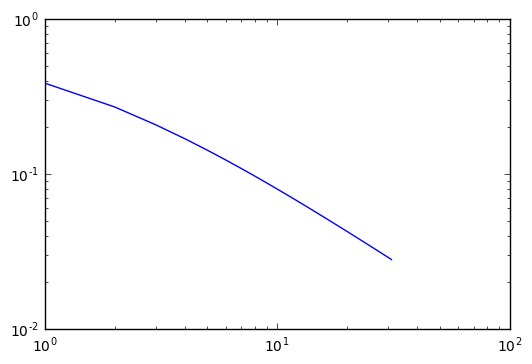

1.238048859


In [27]:
answer = 1.2660658777520083356
nptlist = range(4,100, 3)
xmax = 1.
xmin = 0.
a0list = []
a0error = []
for npts in nptlist:
    offset = (xmax - xmin)/(3*npts)
    grid = makegrid(npts, offset)
    a0list.append(findAi(evalW1, evalbasis, grid, 0, xmin, xmax, '3/8simpson'))
    a0error.append(abs(findAi(evalW1, evalbasis, grid, 0, xmin, xmax, '3/8simpson') - answer))
    A = np.zeros(npts)
plt.loglog(a0error)
plt.show()
print(a0list[-1])

In [29]:
answer = 1.2660658777520083356
npts = 1000
xmax = 1.
xmin = 0.
a0list = []
a0error = []
offset = (xmax - xmin)/(2*npts)
grid = makegrid(npts, offset)
nbasis = 5
A = np.zeros(nbasis)
for i in range(nbasis):
    A[i] = findAi(evalW1, evalbasis, grid, i, xmin, xmax, '3/8simpson')

Let's plot the basis functions and the interpolation.

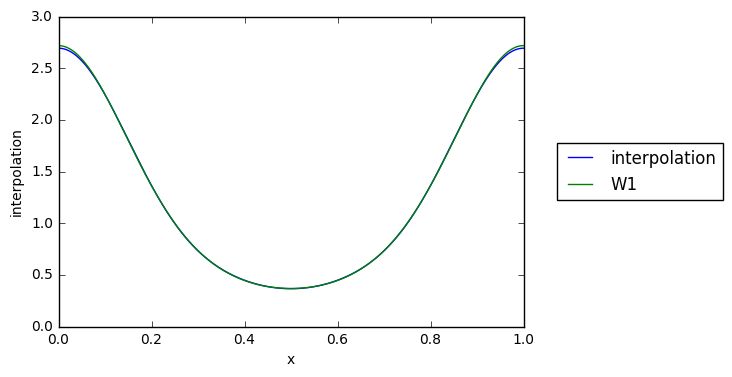

In [30]:
interp = [eval_interp(A, xi) for xi in finegrid]
plt.plot(finegrid, interp, label="interpolation")
plt.plot(finegrid, W1, label="W1")
plt.xlabel("x")
plt.ylabel("interpolation")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

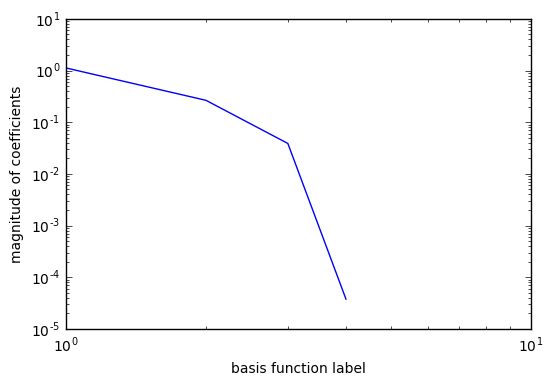

In [28]:
plt.loglog(abs(A))
plt.ylabel("magnitude of coefficients")
plt.xlabel("basis function label")
plt.show()

Let's generate a convergence plot for the different methods to see how they compare.

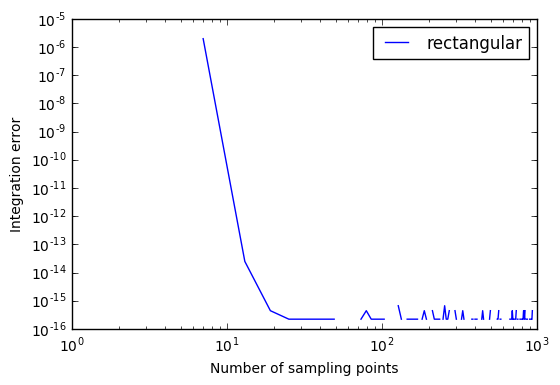

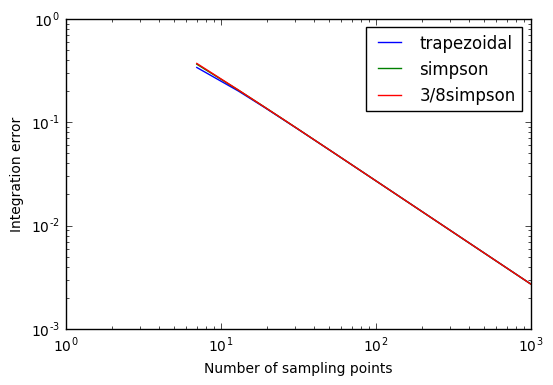

In [31]:
int_methods = ["rectangular","trapezoidal","simpson","3/8simpson"]
nptlist = range(7, 1000, 6)
xmax = 1.
xmin = 0.
answer = 1.2660658777520083356
errors = [[] for _ in range(len(int_methods))]
for (i,method) in enumerate(int_methods):
    for npts in nptlist:
        offset = (xmax - xmin)/(7*npts)
        grid = makegrid(npts, offset)
        errors[i].append(abs(answer - findAi(evalW1, evalbasis, grid, 0, xmin, xmax, method)))

for i in [0]:
    plt.loglog(nptlist, errors[i], label=int_methods[i])
plt.xlabel("Number of sampling points")
plt.ylabel("Integration error")
plt.legend()
plt.show()
plt.close()

for i in [1,2,3]:
    plt.loglog(nptlist, errors[i], label=int_methods[i])
plt.xlabel("Number of sampling points")
plt.ylabel("Integration error")
plt.legend()
plt.show()

Let's integrate with many different offsets.

## Convergence of matrix inverse method comparing offsets

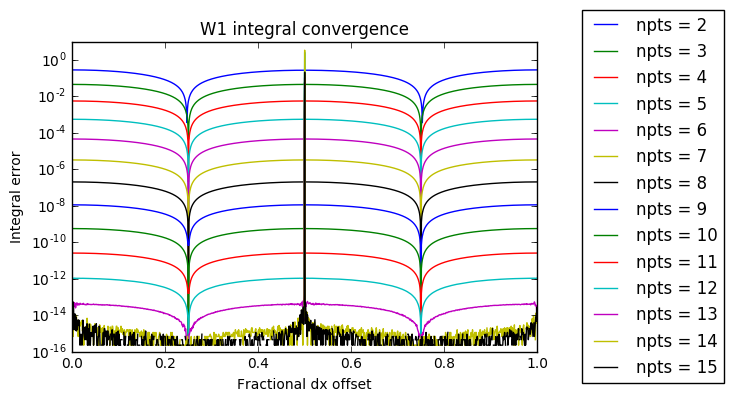

In [32]:
answer = 1.2660658777520083356
#answer = 0.
errors = []
nptlist = range(2,16)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        F = np.asarray([evalW1(x) for x in grid])
        B = makeB(grid, npts)
        A = np.dot(np.linalg.inv(B), F)
        errors[i, j] = np.abs(answer - A[0])

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

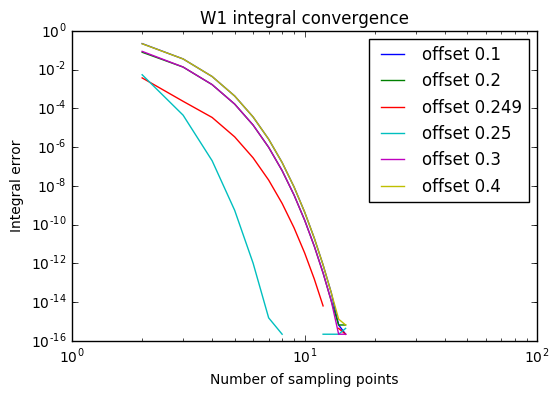

In [33]:
answer = 1.2660658777520083356
errors = []
nptlist = range(2,16)
frac_offsets = [0.1, 0.2, .249, 1./4, 0.3, 0.4]
errors = [[] for _ in range(len(frac_offsets))]
for (i,f_offset) in enumerate(frac_offsets):
    for npts in nptlist:
        offset = (xmax - xmin)/(npts)*f_offset
        grid = makegrid(npts, offset)
        F = np.asarray([evalW1(x) for x in grid])
        B = makeB(grid, npts)
        A = np.dot(np.linalg.inv(B), F)
        errors[i].append(np.abs(answer - A[0]))
        
for i in range(len(frac_offsets)):
    plt.loglog(nptlist, errors[i], label="offset %s" %frac_offsets[i])
plt.title("W1 integral convergence")
plt.xlabel("Number of sampling points")
plt.ylabel("Integral error")
plt.legend()
plt.show()

Let's do these same tests for a cutoff W1

In [12]:
def eval_cutW1(x, cutoff):
    eW1 = evalW1(x)
    if eW1 <= cutoff:
        return eW1
    else:
        return 0.

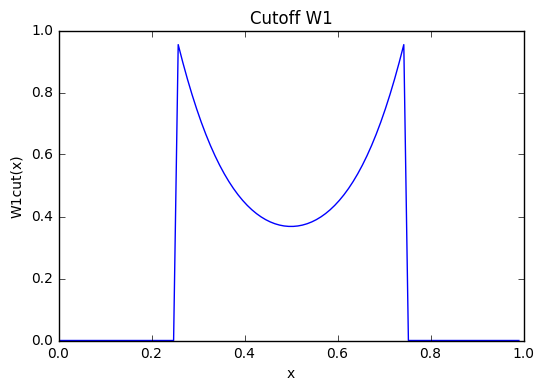

In [39]:
cutoff = 1.
grid = makegrid(101,0.)
W1cut = [eval_cutW1(g, cutoff) for g in grid]
plt.plot(grid, W1cut)
plt.xlabel("x")
plt.ylabel("W1cut(x)")
plt.title("Cutoff W1")
plt.show()

In [35]:
npts = 2
offset = 0.0
grid = makegrid(npts, offset)
F = np.asarray([eval_cutW1(x,cutoff) for x in grid])
B = makeB(grid, npts)
A = np.dot(np.linalg.inv(B), F)

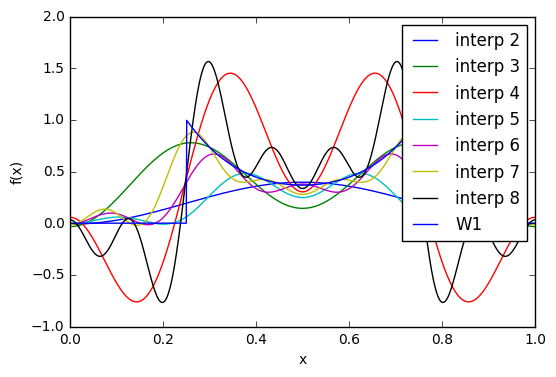

In [36]:
finegrid = makegrid(1001,0.)
cutW1 = [eval_cutW1(fg,cutoff) for fg in finegrid]
nptlist = range(2,9)
for npts in nptlist:
    offset = (1. - 0.)/(10.*npts)
    grid = makegrid(npts, offset)
    F = np.asarray([eval_cutW1(x, cutoff) for x in grid])
    B = makeB(grid, npts)
    A = np.dot(np.linalg.inv(B), F)
    interp = [eval_interp(A, xi) for xi in finegrid]
    plt.plot(finegrid, interp, label="interp %s" %npts)
plt.plot(finegrid, cutW1, label="W1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

This isn't too pretty.

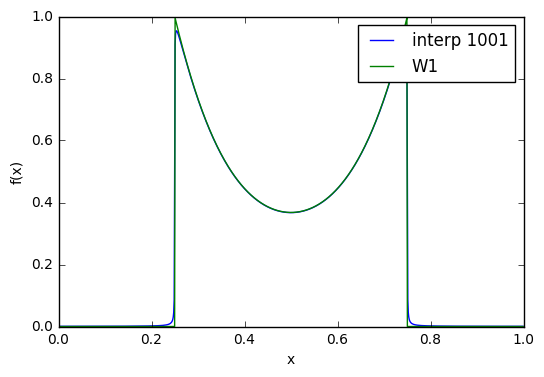

In [37]:
finegrid = makegrid(1001,0.)
cutW1 = [eval_cutW1(fg,cutoff) for fg in finegrid]
nptlist = range(1001,1002)
for npts in nptlist:
    offset = (1. - 0.)/(3*npts)
    grid = makegrid(npts, offset)
    F = np.asarray([eval_cutW1(x, cutoff) for x in grid])
    B = makeB(grid, npts)
    A = np.dot(np.linalg.inv(B), F)
    interp = [eval_interp(A, xi) for xi in finegrid]
    plt.plot(finegrid, interp, label="interp %s" %npts)
plt.plot(finegrid, cutW1, label="W1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

If we use 1001 sampling point, it doesn't look too bad.

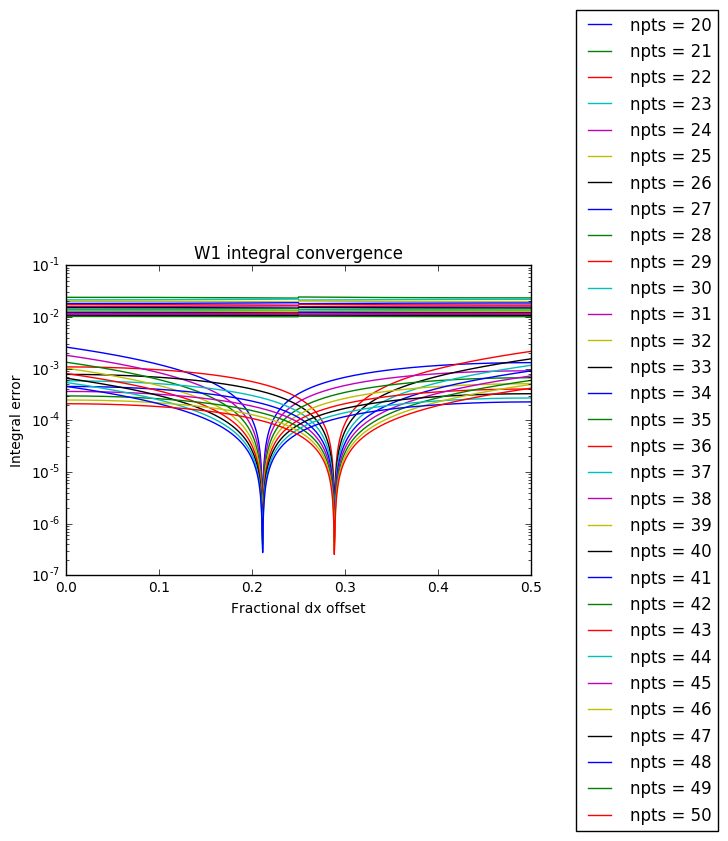

In [38]:
answer = 0.27791134590705872343
errors = []
nptlist = range(20,51)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(2*noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        F = np.asarray([eval_cutW1(x, cutoff) for x in grid])
        B = makeB(grid, npts)
        A = np.dot(np.linalg.inv(B), F)
        errors[i, j] = np.abs(answer - A[0])

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()


It looks like the ideal offset is different for the cutoff W1. It might also depend on if the number of sampling points is even or odd.

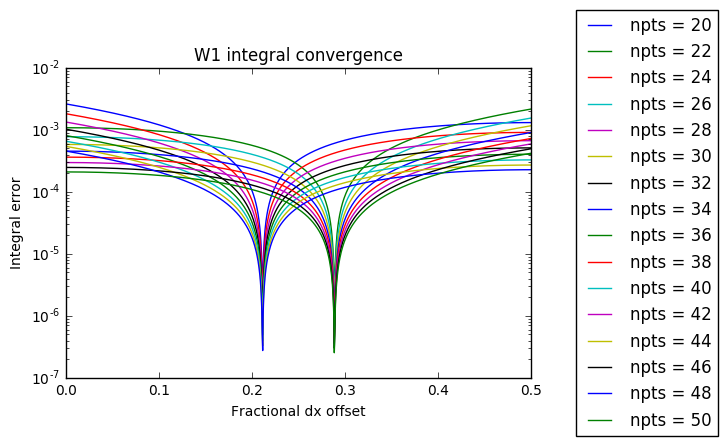

In [39]:
answer = 0.27791134590705872343
errors = []
nptlist = range(20,51,2)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(2*noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        F = np.asarray([eval_cutW1(x, cutoff) for x in grid])
        B = makeB(grid, npts)
        A = np.dot(np.linalg.inv(B), F)
        errors[i, j] = np.abs(answer - A[0])

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()


For the even number of divisions it looks pretty good. One is close to 0.2115 and the other is close to 0.2885. The sum of these offsets is 1/2 and the difference is 0.077

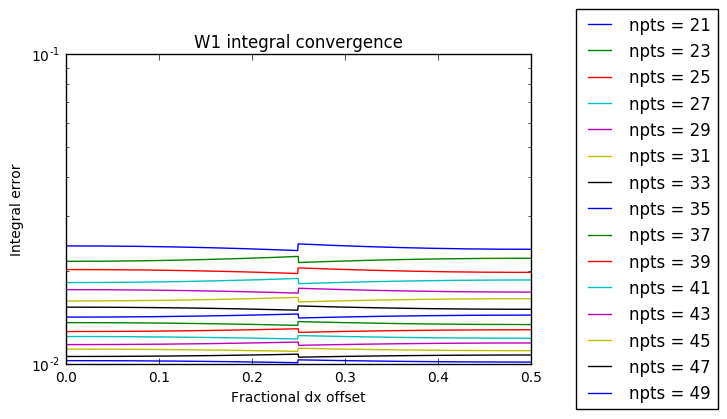

In [40]:
answer = 0.27791134590705872343
errors = []
nptlist = range(21,51,2)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(2*noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        F = np.asarray([eval_cutW1(x, cutoff) for x in grid])
        B = makeB(grid, npts)
        A = np.dot(np.linalg.inv(B), F)
        errors[i, j] = np.abs(answer - A[0])

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

For odd number of divisions, it is always ugly.

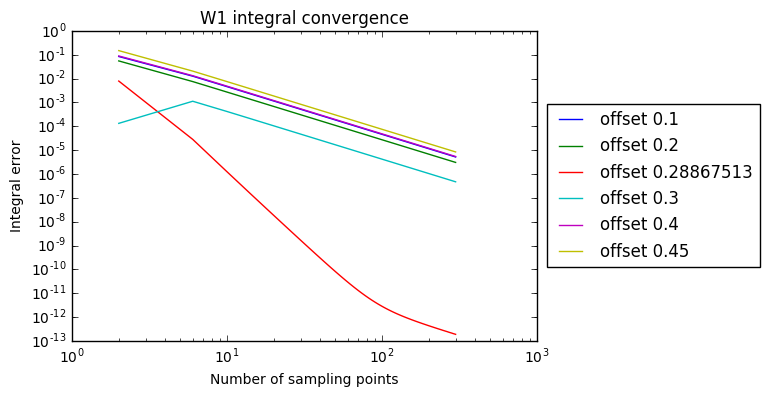

In [13]:
answer = 0.27791134590705872343
errors = []
nptlist = range(2,300,4)
cutoff = 1.
frac_offsets = [.1, .2, .28867513, .3, .4, .45]
errors = [[] for _ in range(len(frac_offsets))]
for (i,f_offset) in enumerate(frac_offsets):
    for npts in nptlist:
        offset = (xmax - xmin)/(npts)*f_offset
        grid = makegrid(npts, offset)
        F = np.asarray([eval_cutW1(x, cutoff) for x in grid])
        B = makeB(grid, npts)
        A = np.dot(np.linalg.inv(B), F)
        errors[i].append(np.abs(answer - A[0]))
        
for i in range(len(frac_offsets)):
    plt.loglog(nptlist, errors[i], label="offset %s" %frac_offsets[i])
plt.title("W1 integral convergence")
plt.xlabel("Number of sampling points")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

Let's do it again but using the rectangle method instead of matrix inversion.

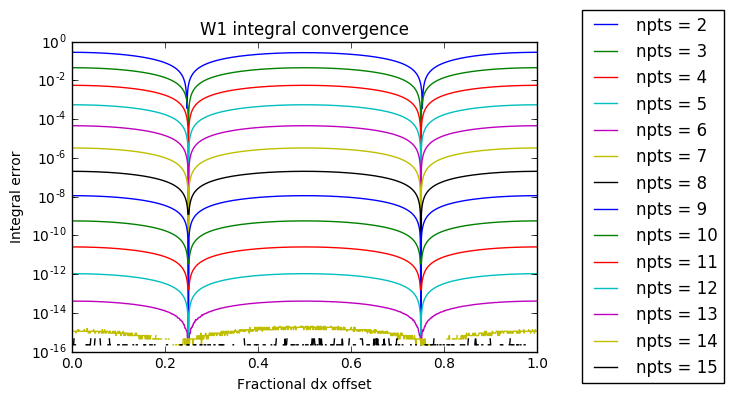

In [78]:
answer = 1.2660658777520083356
#answer = 0.
errors = []
nptlist = range(2, 16)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        # F = np.asarray([evalW1(x) for x in grid])
        # B = makeB(grid, npts)
        # A = np.dot(np.linalg.inv(B), F)
        errors[i,j] = abs(answer - findAi(evalW1, evalbasis, grid, 0, xmin, xmax, "rectangular"))
        # errors[i, j] = np.abs(answer - A[0])

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

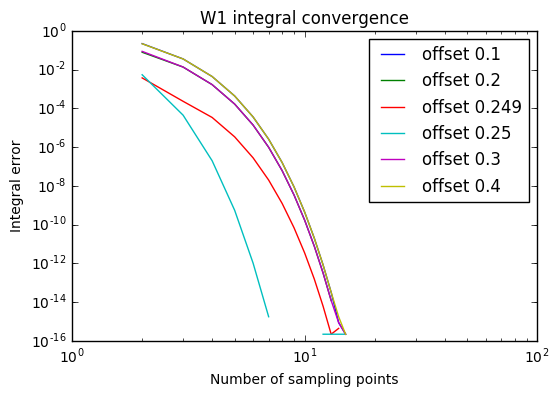

In [82]:
answer = 1.2660658777520083356
errors = []
nptlist = range(2,16)
frac_offsets = [0.1, 0.2, .249, 1./4, 0.3, 0.4]
errors = [[] for _ in range(len(frac_offsets))]
for (i,f_offset) in enumerate(frac_offsets):
    for npts in nptlist:
        offset = (xmax - xmin)/(npts)*f_offset
        grid = makegrid(npts, offset)
        # F = np.asarray([evalW1(x) for x in grid])
        # B = makeB(grid, npts)
        # A = np.dot(np.linalg.inv(B), F)
        A = findAi(evalW1, evalbasis, grid, 0, xmin, xmax, "rectangular")
        errors[i].append(np.abs(answer - A))
        
for i in range(len(frac_offsets)):
    plt.loglog(nptlist, errors[i], label="offset %s" %frac_offsets[i])
plt.title("W1 integral convergence")
plt.xlabel("Number of sampling points")
plt.ylabel("Integral error")
plt.legend()
plt.show()

This is about the same result for matrix inversion. Try it with the cutoff W1.

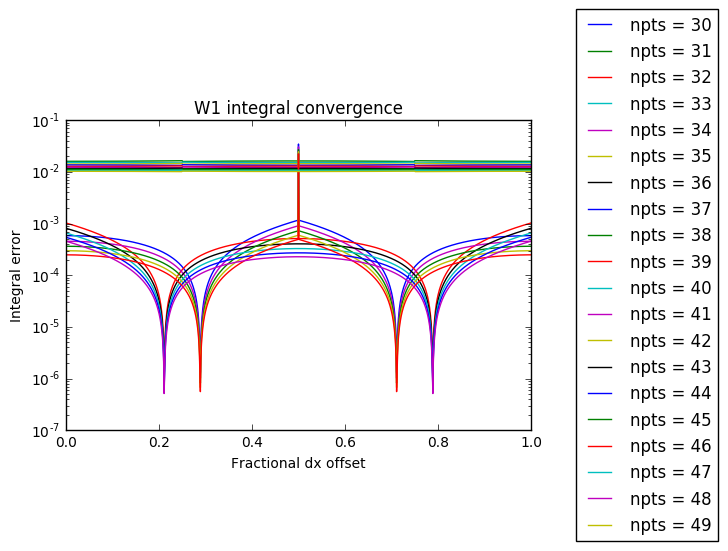

In [93]:
# answer = 1.2660658777520083356
answer = 0.27791134590705872343
#answer = 0.
errors = []
nptlist = range(30, 50)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        errors[i,j] = abs(answer - findAi(eval_cutW1, evalbasis, grid, 0, xmin, xmax, "rectangular", cutoff))

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

Looks familiar.

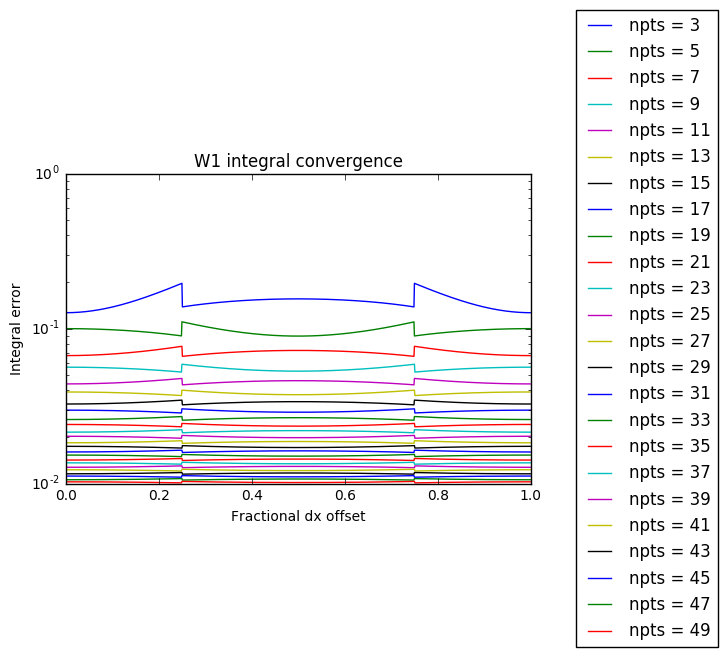

In [94]:
# answer = 1.2660658777520083356
answer = 0.27791134590705872343
#answer = 0.
errors = []
nptlist = range(3,50,2)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        errors[i,j] = abs(answer - findAi(eval_cutW1, evalbasis, grid, 0, xmin, xmax, "rectangular", cutoff))

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

Same as before.

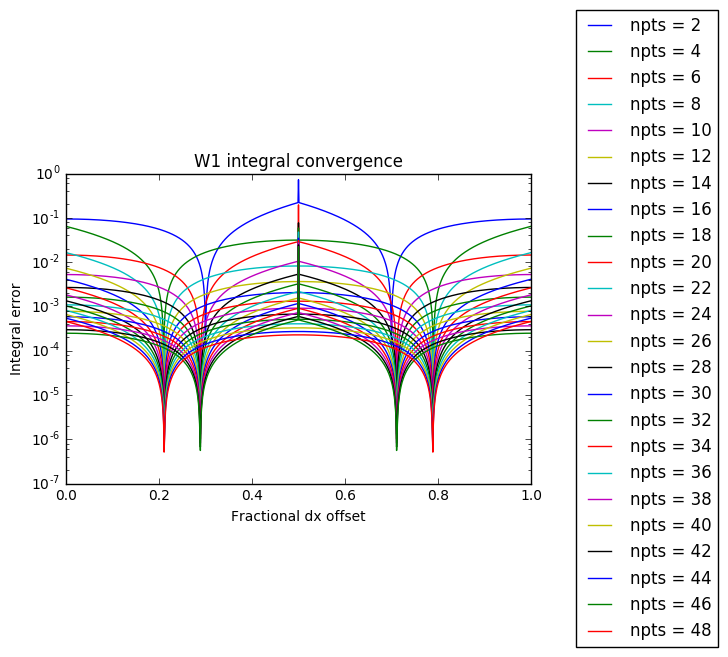

In [95]:
# answer = 1.2660658777520083356
answer = 0.27791134590705872343
#answer = 0.
errors = []
nptlist = range(2,50,2)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        errors[i,j] = abs(answer - findAi(eval_cutW1, evalbasis, grid, 0, xmin, xmax, "rectangular", cutoff))

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

Let's see if we can identify which grids correspond to each offset.

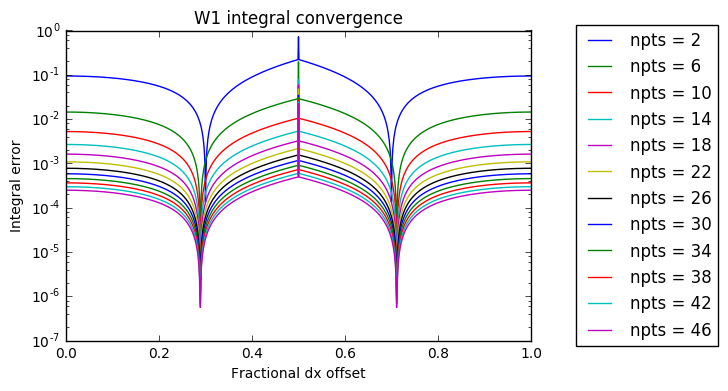

In [96]:
answer = 0.27791134590705872343
errors = []
nptlist = range(2,50,4)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        errors[i,j] = abs(answer - findAi(eval_cutW1, evalbasis, grid, 0, xmin, xmax, "rectangular", cutoff))

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

If the number of sampling points is 2, 6, 10, ..., the optimal offset is around .3.

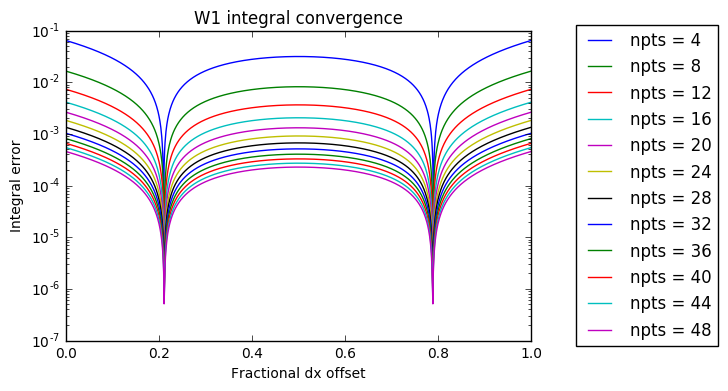

In [97]:
answer = 0.27791134590705872343
errors = []
nptlist = range(4,50,4)
xmax = 1.
xmin = 0.
noffsets = 1000
errors = np.zeros([len(nptlist), noffsets-1])
for (i,npts) in enumerate(nptlist):
    dx = (xmax - xmin)/npts
    offset_list = [dx*i/(noffsets) for i in range(1, noffsets)]
    frac_offset = [ol/dx for ol in offset_list]
    for (j,offset) in enumerate(offset_list):
        grid = makegrid(npts, offset)
        errors[i,j] = abs(answer - findAi(eval_cutW1, evalbasis, grid, 0, xmin, xmax, "rectangular", cutoff))

for j in range(len(nptlist)):
    plt.semilogy(frac_offset, errors[j,:], label="npts = %s" %nptlist[j])
plt.title("W1 integral convergence")
plt.xlabel("Fractional dx offset")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

If the number of sampling points is 4, 8, 12, ..., the optimal offset is around .2.

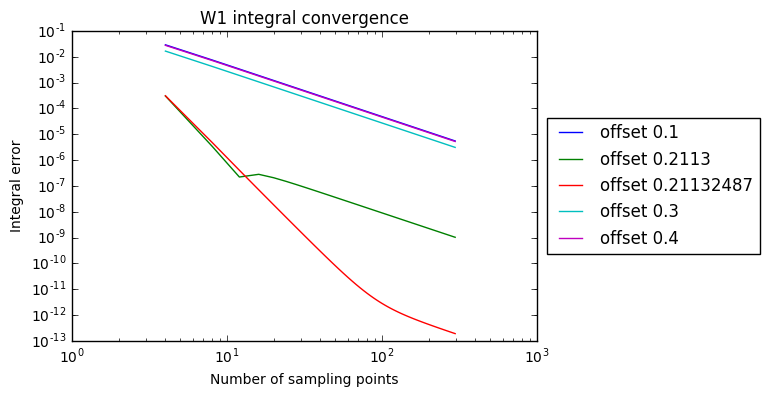

In [98]:
answer = 0.27791134590705872343
errors = []
nptlist = range(4,300,4)
frac_offsets = [.1, .2113, .21132487, .3, .4]
errors = [[] for _ in range(len(frac_offsets))]
for (i,f_offset) in enumerate(frac_offsets):
    for npts in nptlist:
        offset = (xmax - xmin)/(npts)*f_offset
        grid = makegrid(npts, offset)
        
        errors[i].append(np.abs(answer - findAi(eval_cutW1, evalbasis, grid, 0, xmin, xmax, "rectangular", cutoff)))
        
for i in range(len(frac_offsets)):
    plt.loglog(nptlist, errors[i], label="offset %s" %frac_offsets[i])
plt.title("W1 integral convergence")
plt.xlabel("Number of sampling points")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

Exact same code as before except the integral was evaluated using rectangular integration. This is the optimal offset for grid divisions equal to 4, 8, 12, ...

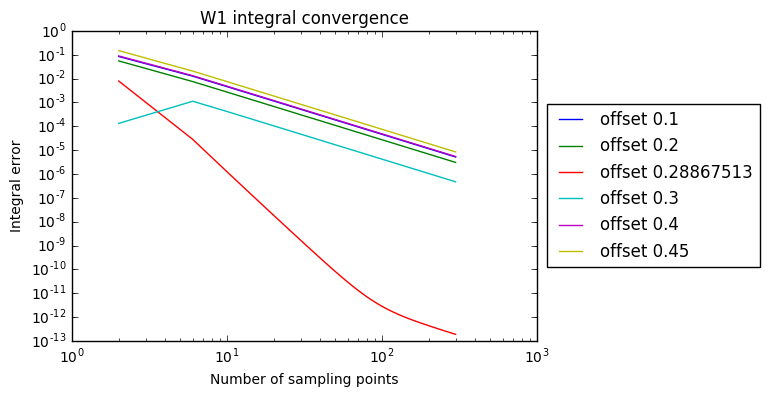

In [100]:
answer = 0.27791134590705872343
errors = []
nptlist = range(2,300,4)
frac_offsets = [.1, .2, .28867513, .3, .4, .45]
errors = [[] for _ in range(len(frac_offsets))]
for (i,f_offset) in enumerate(frac_offsets):
    for npts in nptlist:
        offset = (xmax - xmin)/(npts)*f_offset
        grid = makegrid(npts, offset)
        errors[i].append(np.abs(answer - findAi(eval_cutW1, evalbasis, grid, 0, xmin, xmax, "rectangular", cutoff)))        
        
for i in range(len(frac_offsets)):
    plt.loglog(nptlist, errors[i], label="offset %s" %frac_offsets[i])
plt.title("W1 integral convergence")
plt.xlabel("Number of sampling points")
plt.ylabel("Integral error")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

Same code as before except integral calculated using rectangular integration. This is the optimal offset for the number of grid points = 2, 6, 10, ...

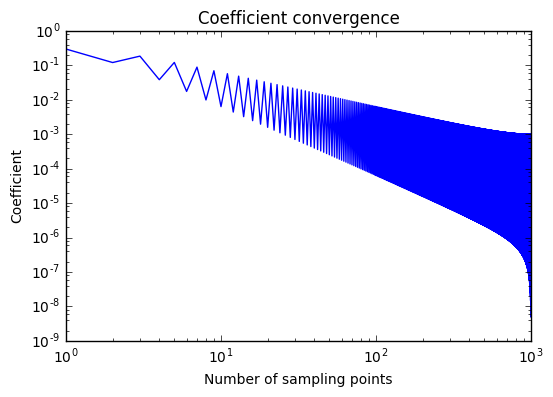

In [60]:
# answer = 1.2660658777520083356
errors = []
cutoff = 1.
npts = 1000
offset = (1. - 0.)/(4.*npts)
grid = makegrid(npts, offset)
F = np.asarray([eval_cutW1(x, cutoff) for x in grid])
B = makeB(grid, npts)
A = np.dot(np.linalg.inv(B), F)
plt.title("Coefficient convergence")
plt.xlabel("Number of sampling points")
plt.ylabel("Coefficient")
plt.loglog(abs(A))
plt.show()

In [ ]:
finegrid = np.linspace(0, 1, 10001)
interp = [eval_interp(A, xi) for xi in finegrid]
plt.plot(finegrid, interp, label="interpolation")
plt.plot(finegrid, W1, label="W1")
plt.xlabel("x")
plt.ylabel("interpolation")
plt.legend(loc="center", bbox_to_anchor=(1.25,0.5))
plt.show()

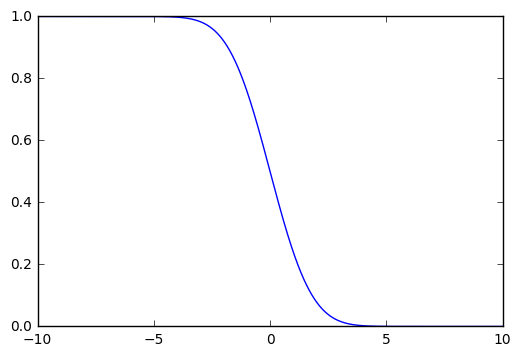

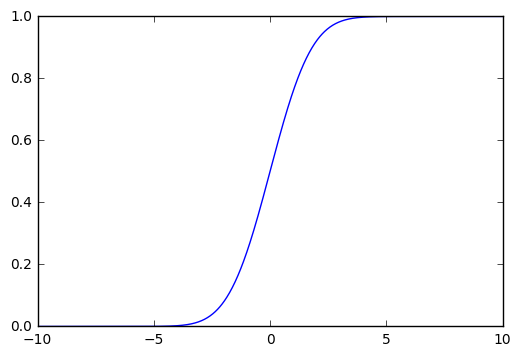

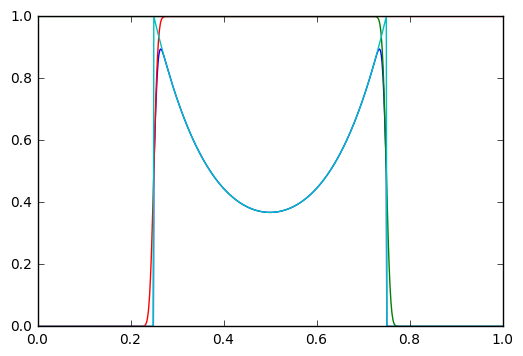

In [65]:
from math import erfc, erf
import numpy as np
import matplotlib.pyplot as plt

def myerfc(a, x):
    return erfc(x/a)/2

def myerf(a, x):
    return (erf(x/a)+1)/2

x = np.linspace(-10,10,1001)
a = 2
f = [myerfc(a, xi) for xi in x]
plt.plot(x,f)
plt.show()

x = np.linspace(-10,10,1001)
f = [myerf(a, xi) for xi in x]
plt.plot(x,f)
plt.show()

def evalW1(x):
    return np.exp(np.cos(2*np.pi*x))

def eval_cutW1(x, cutoff):
    eW1 = evalW1(x)
    if eW1 <= cutoff:
        return eW1
    else:
        return 0.

def eval_smoothedW1(x, a, b, alpha, cutoff):
    eW1 = evalW1(x)
    if eW1 <= cutoff:
        return eW1*myerf(alpha, x - a)*myerfc(alpha, x - b)
    else:
        return 0.

x = np.linspace(0,1,1001)
a = 1./4
b = 3./4
alpha = .01
cutoff = 1.
j = [eval_cutW1(xi, cutoff) for xi in x]
f = [eval_smoothedW1(xi, a, b, alpha, cutoff) for xi in x]
g = [myerfc(alpha, xi-b) for xi in x]
h = [myerf(alpha, xi-a) for xi in x]
plt.plot(x,f)
plt.plot(x,g)
plt.plot(x,h)
plt.plot(x,j)
plt.show()